In [1]:
from itertools import permutations as perms
from itertools import product
import numpy as np
import MultiPoint as mp
import propagator
import wignerD as wd

In [2]:
from CORRcalc import *

In [3]:
import imp  # imp.reload(module)
import matplotlib.pyplot as plt
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [4]:
def plotlog(x, y, alpha, xrange=1, numx=2):
    xv = np.logspace(np.log10(x), np.log10(x) + xrange, numx)
    C = y / (x**alpha)
    yv = C * xv**(alpha)
    plt.loglog(xv, yv, 'k--')

## Set of Ks for testing

In [5]:
def set3Ks(K):
    k1 = np.array([1,0,0])*K
    k2 = np.array([-0.5,0.5*np.sqrt(3),0])*K
    k3 = -k1-k2

    Ks = [k1, k2, k3]
    return Ks

In [6]:
def set4Ks_line(K):
    k1=np.array([1,0,0])*K
    k2=np.array([-1,0,0])*K
    k3=-k1
    k4=-k2

    k = [k1, k2, k3, k4]
    return k

In [7]:
def set4Ks_square(K):
    k1=np.array([1,0,0])*K
    k2=np.array([0,1,0])*K
    k3=-k1
    k4=-k2

    k = [k1, k2, k3, k4]
    return k

## 1. Structure factors

In [113]:
# Wormlike chain
FA=1.0
N=1000

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

KV = np.logspace(-1,2,100)
s2 = np.zeros((len(KV)),dtype=type(1+1j))
s3 = np.zeros((len(KV)),dtype=type(1+1j))
s4L = np.zeros((len(KV)),dtype=type(1+1j))
s4S = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    s2[ind] = s2wlc(pset, N, FA, K, sequence=[0,0])/(N**2)

    Ks = set3Ks(K)
    s3[ind] = s3wlc(pset, N, FA, Ks, sequence=[0,0,0])/(N**3)
    
    Ks = set4Ks_line(K)
    s4L[ind] = s4wlc(pset, wigset, N, FA, Ks, sequence=[0,0,0,0])/(N**4)
    
    Ks = set4Ks_square(K)
    s4S[ind] = s4wlc(pset, wigset, N, FA, Ks, sequence=[0,0,0,0])/(N**4)

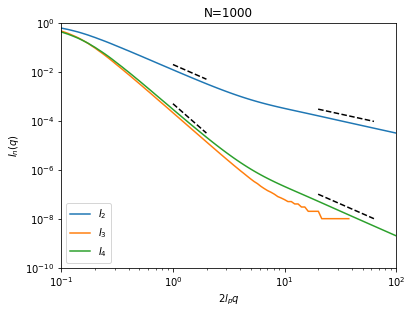

In [120]:
plt.figure(figsize=(6,4.5))
plt.title('N='+str(N))
plt.loglog(KV, s2.real, label='$I_{2}$')
plt.loglog(KV, s3.real, label='$I_{3}$')
plt.loglog(KV, s4L.real, label='$I_{4}$')

if N == 1:
    plotlog(5e1,8e-2,-1,xrange=0.3)
    plotlog(5e1,1.5e-2,-2,xrange=0.3)
    plotlog(5e1,0.4e-2,-2,xrange=0.3)
elif N == 1e3:
    plotlog(1e0,2e-2,-2,xrange=0.3)
    plotlog(1e0,5e-4,-4,xrange=0.3)
    plotlog(2e1,3e-4,-1,xrange=0.5)
    plotlog(2e1,1e-7,-2,xrange=0.5)

plt.xlim([1e-1,KV[-1]])
plt.ylim([1e-10,1e0])
plt.xlabel('$2l_pq$')
plt.ylabel('$I_{n}(q)$')
plt.legend(loc=3)
plt.show()
# plt.savefig('figs/I'+str(N)+'.eps')

In [118]:
filename = 'data/SN'+str(N)
f = open(filename, 'w')

for i in range(len(KV)):
    f.write(' %.3f, %.8f, %.8f, %.8f, %.8f\n'
            %(KV[i], s2[i].real, s3[i].real, s4L[i].real, s4S[i].real))
f.close()

In [119]:
N = 1000
KV, s2, s3, s4 = [np.array([])]*4
filename = 'data/SN'+str(N)
with open(filename, 'r') as f:
    content = f.readlines()
    lines = [line.strip().split(', ') for line in content]
    for line in lines:
        KV = np.append(KV, float(line[0]))
        s2 = np.append(s2, float(line[1]))
        s3 = np.append(s3, float(line[2]))
        s4 = np.append(s4, float(line[3]))

## 2. Check Leibler's identities

In [ ]:
N=1.0
FA=0.2

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

K = 10.0
Ks3 = set3Ks(K)
Ks4 = set4Ks_line(K)

print(s3wlc(pset, N, FA, Ks3, sequence=[0, 1, 0]))
print(s3wlc(pset, N, FA, Ks3, sequence=[1, 0, 0]))

print(s3wlc(pset, N, FA, Ks3, sequence=[1, 0, 1]))
print(s3wlc(pset, N, FA, Ks3, sequence=[0, 1, 1]))

print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[0, 0, 0, 1]))
print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[0, 0, 1, 0]))
print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[0, 1, 0, 0]))
print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[1, 0, 0, 0]))

print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[1, 1, 0, 0]))
print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[0, 0, 1, 1]))

print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[1, 0, 0, 1]))
print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[0, 1, 1, 0]))

print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[1, 0, 1, 0]))
print(s4wlc(pset, wigset, N, FA, Ks4, sequence=[0, 1, 0, 1]))

## 3. Check with rigid rod limits

### 3.1 Pair correlation

In [ ]:
FA=1.0
sequence = [0,0]
kL = np.linspace(0,20,100)

# Rigid rod
NRR = 100
KVRR = kL/NRR
r2 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    r2[ind] = r2wlc(NRR, FA, K, sequence=sequence)/(NRR**2)

In [ ]:
# Wormlike chain
pset=propagator.prop_set(nlam=1)

N=1.0
KV = kL/N
s2_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    s2_N1[ind] = s2wlc(pset, N, FA, K, sequence=sequence)/(N**2)
    
N=0.1
KV = kL/N
s2_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    s2_Np1[ind] = s2wlc(pset, N, FA, K, sequence=sequence)/(N**2)

In [ ]:
kL = np.linspace(0,20,100)
plt.plot(kL, r2.real*kL, label='Rigid Rod')
plt.plot(kL, s2_N1.real*kL, label='N=1')
plt.plot(kL, s2_Np1.real*kL, label='N=0.1')
plt.xlabel('kL')
plt.ylabel('SkL')
plt.legend(loc=4)
plt.axis([0,20,0,3.5])
plt.show()

### 3.2 Three-point correlations

In [ ]:
FA=1.0
sequence = [0,0,0]
kL = np.linspace(0,30,100)

# Rigid rod
NRR = 100
KVRR = kL/NRR
r3 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    Ks = set3Ks(K)
    r3[ind] = r3wlc(NRR, FA, Ks, sequence=sequence)/(NRR**3)

In [ ]:
# Wormlike chain
pset=propagator.prop_set(nlam=10)

N=1.0
KV = kL/N
s3_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set3Ks(K)
    s3_N1[ind] = s3wlc(pset, N, FA, Ks, sequence=sequence)/(N**3)

N=0.1
KV = kL/N
s3_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set3Ks(K)
    s3_Np1[ind] = s3wlc(pset, N, FA, Ks, sequence=sequence)/(N**3)

In [ ]:
kL = np.linspace(0,30,100)
plt.figure(figsize=(8,6))
plt.plot(kL, r3.real*kL**2, label='Rigid rod')
plt.plot(kL, s3_N1.real*kL**2, label='N=1.0')
plt.plot(kL, s3_Np1.real*kL**2, label='N=0.1')
plt.legend(loc=1)
plt.xlabel('$qL$')
plt.ylabel('$S(qL)^2$')
plt.axis([0,30,0,14])
# plt.show()
plt.savefig('test.eps')

In [ ]:
# filename = 'data/I3RR'
# f = open(filename, 'w')

# for i in range(len(kL)):
#     f.write(' %.3f, %.8f\n' %(kL[i], r3[i].real))
# f.close()

In [ ]:
kL, r3 = np.array([]), np.array([])
filename = 'data/I3RR'
with open(filename, 'r') as f:
    content = f.readlines()
    lines = [line.strip().split(', ') for line in content]
    for line in lines:
        kL = np.append(kL, float(line[0]))
        r3 = np.append(r3, float(line[1]))

### 3.3 Four-point correlations

In [ ]:
FA=1.0
sequence = [0,0,0,0]
kL = np.linspace(0.1,30,100)

In [ ]:
# Rigid rod
NRR = 50
KVRR = kL/NRR
r4 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    print(ind)
    Ks = set4Ks_square(K)
    r4[ind] = r4wlc(NRR, FA, Ks, sequence=sequence)/(NRR**4)

In [ ]:
# Wormlike chain
pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

N = 1
KV = kL/N
s4_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set4Ks_square(K)
    s4_N1[ind] = s4wlc(pset, wigset, N, FA, Ks, sequence=sequence)/(N**4)
    
N = 0.1
KV = kL/N
s4_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set4Ks_square(K)
    s4_Np1[ind] = s4wlc(pset, wigset, N, FA, Ks, sequence=sequence)/(N**4)

In [ ]:
plt.plot(kL, r4.real*kL**2, label='Rigid rod')
plt.plot(kL, s4_N1.real*kL**2, label='N=1.0')
plt.plot(kL, s4_Np1.real*kL**2, label='N=0.1')
plt.legend(loc=4)
plt.xlabel('$kL$')
plt.ylabel('$(kL)^2S_{4}$')
plt.show()

## 4. Cross-chemical-identity correlations

In [ ]:
FA=0.5
sequence = [0,1]
kL = np.linspace(0,20,100)

# Rigid rod
NRR = 10
KVRR = kL/NRR
r2 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    r2[ind] = r2wlc(NRR, FA, K, sequence=sequence)/(NRR**2)

In [ ]:
# Wormlike chain
pset=propagator.prop_set(nlam=1)

N=1.0
KV = kL/N
s2_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    s2_N1[ind] = s2wlc(pset, N, FA, K, sequence=sequence)/(N**2)
    
N=0.1
KV = kL/N
s2_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    s2_Np1[ind] = s2wlc(pset, N, FA, K, sequence=sequence)/(N**2)

In [ ]:
plt.plot(kL, r2.real, label='Rigid Rod')
plt.plot(kL, s2_N1.real, label='N=1')
plt.plot(kL, s2_Np1.real, label='N=0.1')
plt.xlabel('kL')
plt.ylabel('S')
plt.legend(loc=1)
# plt.axis([2,20,2,3.5])
plt.show()

### 4.2 Three-point correlations

In [ ]:
FA=0.5
sequence = [0,0,1]
kL = np.linspace(0,30,100)

# Rigid rod
NRR = 10
KVRR = kL/NRR
r3 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    Ks = set3Ks(K)
    r3[ind] = r3wlc(NRR, FA, Ks, sequence=sequence)/(NRR**3)

In [ ]:
# Wormlike chain
pset=propagator.prop_set(nlam=2)

N=1.0
KV = kL/N
s3_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set3Ks(K)
    s3_N1[ind] = s3wlc(pset, N, FA, Ks, sequence=sequence)/(N**3)

N=0.1
KV = kL/N
s3_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set3Ks(K)
    s3_Np1[ind] = s3wlc(pset, N, FA, Ks, sequence=sequence)/(N**3)

In [ ]:
plt.plot(kL, r3.real, label='Rigid rod')
plt.plot(kL, s3_N1.real, label='N=1.0')
plt.plot(kL, s3_Np1.real, label='N=0.1')
plt.legend(loc=1)
plt.xlabel('kL')
plt.ylabel('S')
plt.show()

### 4.3 Four-point correlations

In [ ]:
FA=0.5
sequence = [0,0,0,1]
kL = np.linspace(0.1,30,10)

# Rigid rod
NRR = 10
KVRR = kL/NRR
r4 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    Ks = set4Ks_square(K)
    r4[ind] = r4wlc(NRR, FA, Ks, sequence=sequence)/(NRR**4)

# Wormlike chain
pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

N = 1
KV = kL/N
s4_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    print(ind)
    Ks = set4Ks_square(K)
    s4_N1[ind] = s4wlc(pset, wigset, N, FA, Ks, sequence=sequence)/(N**4)
    
N = 0.1
KV = kL/N
s4_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    print(ind)
    Ks = set4Ks_square(K)
    s4_Np1[ind] = s4wlc(pset, wigset, N, FA, Ks, sequence=sequence)/(N**4)

In [ ]:
plt.plot(kL, r4.real*kL**2, label='Rigid rod')
plt.plot(kL, s4_N1.real*kL**2, label='N=1.0')
plt.plot(kL, s4_Np1.real*kL**2, label='N=0.1')
plt.legend(loc=4)
plt.xlabel('$kL$')
plt.ylabel('$(kL)^2S_{4}$')
plt.ylim([-1,1])
plt.show()

## 5. Code Profiling

In [ ]:
# import cProfile
# cProfile.run('s4wlc(pset, N, FA, Ks, sequence=sequence)')

## 6. All chemical identities

In [ ]:
FA = 0.5

# KV = np.logspace(-1,3,10)
KV = [1e-2]
N = 1e3

pset=propagator.prop_set(nlam=1)
wigset = wd.wigner_d_vals()

s4 = np.zeros((2,2,2,2,len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set4Ks_line(K)
    s4[:,:,:,:,ind] = s4wlc(pset, wigset, N, FA, Ks)/(N**4)